In [1]:
#importing the Libraries
#Basic data Analysis
#Basis Data Visulization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Removing Warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#We are working on the UsReal Data set
#Importing the Csv File
#Separate the Data into Dependent and Independent Variables
data=pd.read_csv("UScereal.csv")
data = data.rename(columns = {"Unnamed: 0":"Items" }) 
X=data.iloc[:,1:11].values
y=data.iloc[:,11].values

In [4]:
#Seeing the insight of the data using the head function
data.head()

,Items,mfr,calories,protein,fat,sodium,fibre,carbo,sugars,shelf,potassium,vitamins
0,100% Bran,N,212.12121,12.121212,3.030303,393.93939,30.303030,15.15152,18.181818,3,848.48485,enriched
1,All-Bran,K,212.12121,12.121212,3.030303,787.87879,27.272727,21.21212,15.151515,3,969.69697,enriched
2,All-Bran with Extra Fiber,K,100.00000,8.000000,0.000000,280.00000,28.000000,16.00000,0.000000,3,660.00000,enriched
3,Apple Cinnamon Cheerios,G,146.66667,2.666667,2.666667,240.00000,2.000000,14.00000,13.333333,1,93.33333,enriched
4,Apple Jacks,K,110.00000,2.000000,0.000000,125.00000,1.000000,11.00000,14.000000,2,30.00000,enriched


In [5]:
#Getting some More Information from the data such as how many dimensions
data.ndim

2

In [6]:
#Getting all the data types
data.dtypes

Items         object
mfr           object
calories     float64
protein      float64
fat          float64
sodium       float64
fibre        float64
carbo        float64
sugars       float64
shelf          int64
potassium    float64
vitamins      object
dtype: object

In [7]:
#Getting information about and the memory usage shown in this is very important features to check how much memory 
#data takes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 12 columns):
Items        65 non-null object
mfr          65 non-null object
calories     65 non-null float64
protein      65 non-null float64
fat          65 non-null float64
sodium       65 non-null float64
fibre        65 non-null float64
carbo        65 non-null float64
sugars       65 non-null float64
shelf        65 non-null int64
potassium    65 non-null float64
vitamins     65 non-null object
dtypes: float64(8), int64(1), object(3)
memory usage: 6.2+ KB


In [8]:
#Shape of the dataset that is independent Variable
X.shape

(65, 10)

In [9]:
#Similarly the Dependent Variable
y.shape

(65,)

In [10]:
#Since Machine Learning wants only numerical features 
#So we have to convert them into numerical using the label encoding and one hot encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X).toarray()
#Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
y=labelencoder_y.fit_transform(y)

In [11]:
#Checking how many types of values in labels
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

In [12]:
data.head()

,Items,mfr,calories,protein,fat,sodium,fibre,carbo,sugars,shelf,potassium,vitamins
0,100% Bran,N,212.12121,12.121212,3.030303,393.93939,30.303030,15.15152,18.181818,3,848.48485,enriched
1,All-Bran,K,212.12121,12.121212,3.030303,787.87879,27.272727,21.21212,15.151515,3,969.69697,enriched
2,All-Bran with Extra Fiber,K,100.00000,8.000000,0.000000,280.00000,28.000000,16.00000,0.000000,3,660.00000,enriched
3,Apple Cinnamon Cheerios,G,146.66667,2.666667,2.666667,240.00000,2.000000,14.00000,13.333333,1,93.33333,enriched
4,Apple Jacks,K,110.00000,2.000000,0.000000,125.00000,1.000000,11.00000,14.000000,2,30.00000,enriched


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 12 columns):
Items        65 non-null object
mfr          65 non-null object
calories     65 non-null float64
protein      65 non-null float64
fat          65 non-null float64
sodium       65 non-null float64
fibre        65 non-null float64
carbo        65 non-null float64
sugars       65 non-null float64
shelf        65 non-null int64
potassium    65 non-null float64
vitamins     65 non-null object
dtypes: float64(8), int64(1), object(3)
memory usage: 6.2+ KB


In [14]:
#checking how many types of mfr values are there in the dataset
data["mfr"].value_counts()

G    22
K    21
P     9
Q     5
R     5
N     3
Name: mfr, dtype: int64

In [15]:
#Describing the data to check the max,min,median,percentiles and other important numerical values that describes your
#Attribute
data.describe()

,calories,protein,fat,sodium,fibre,carbo,sugars,shelf,potassium
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,149.408258,3.683705,1.422538,237.838364,3.870844,19.967620,10.050842,2.169231,159.119749
std,62.411875,2.642618,1.647240,130.629623,6.133404,8.468468,5.835239,0.839815,180.288583
min,50.000000,0.751880,0.000000,0.000000,0.000000,10.526320,0.000000,1.000000,15.000000
25%,110.000000,2.000000,0.000000,180.000000,0.000000,15.000000,4.000000,1.000000,45.000000
50%,134.328360,3.000000,1.000000,232.000000,2.000000,18.666670,12.000000,2.000000,96.590910
75%,179.104480,4.477612,2.000000,290.000000,4.477612,22.388060,14.000000,3.000000,220.000000
max,440.000000,12.121212,9.090909,787.878790,30.303030,68.000000,20.895522,3.000000,969.696970


Text(0.5, 1.0, 'Count Plot Of MFR Values')

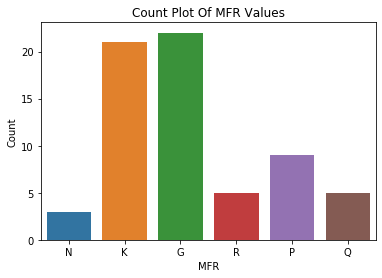

In [16]:
#Plotting the countplot to visualize the number of MFr values
sns.countplot(data["mfr"])
plt.xlabel("MFR")
plt.ylabel("Count")
plt.title("Count Plot Of MFR Values")

In [17]:
#Checking if there is some null values
data.isnull().any()

Items        False
mfr          False
calories     False
protein      False
fat          False
sodium       False
fibre        False
carbo        False
sugars       False
shelf        False
potassium    False
vitamins     False
dtype: bool

In [18]:
#If there is some null values check how many in each feature
data.isnull().sum()

Items        0
mfr          0
calories     0
protein      0
fat          0
sodium       0
fibre        0
carbo        0
sugars       0
shelf        0
potassium    0
vitamins     0
dtype: int64

In [19]:
#getting column names in the data
data.columns

Index(['Items', 'mfr', 'calories', 'protein', 'fat', 'sodium', 'fibre',
       'carbo', 'sugars', 'shelf', 'potassium', 'vitamins'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of Calories')

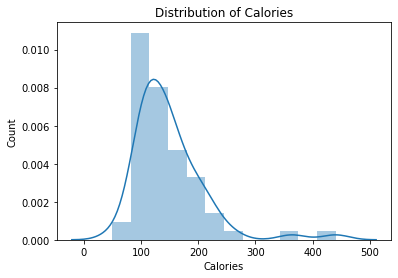

In [20]:
#It is the distribution plot Calories feature to see how they are distributed
sns.distplot(data["calories"])
plt.xlabel("Calories")
plt.ylabel("Count")
plt.title("Distribution of Calories")

Text(0.5, 1.0, 'Distribution of Protein')

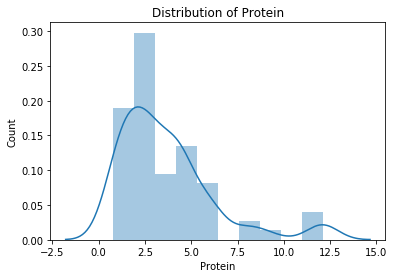

In [21]:
#Same It is the Distribution plot For Protein
sns.distplot(data["protein"])
plt.xlabel("Protein")
plt.ylabel("Count")
plt.title("Distribution of Protein")

Text(0.5, 1.0, 'Distribution of fat')

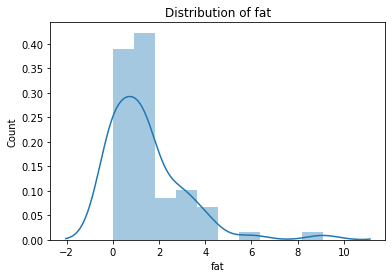

In [22]:
#Distribution Plot of the Fat
sns.distplot(data["fat"])
plt.xlabel("fat")
plt.ylabel("Count")
plt.title("Distribution of fat")

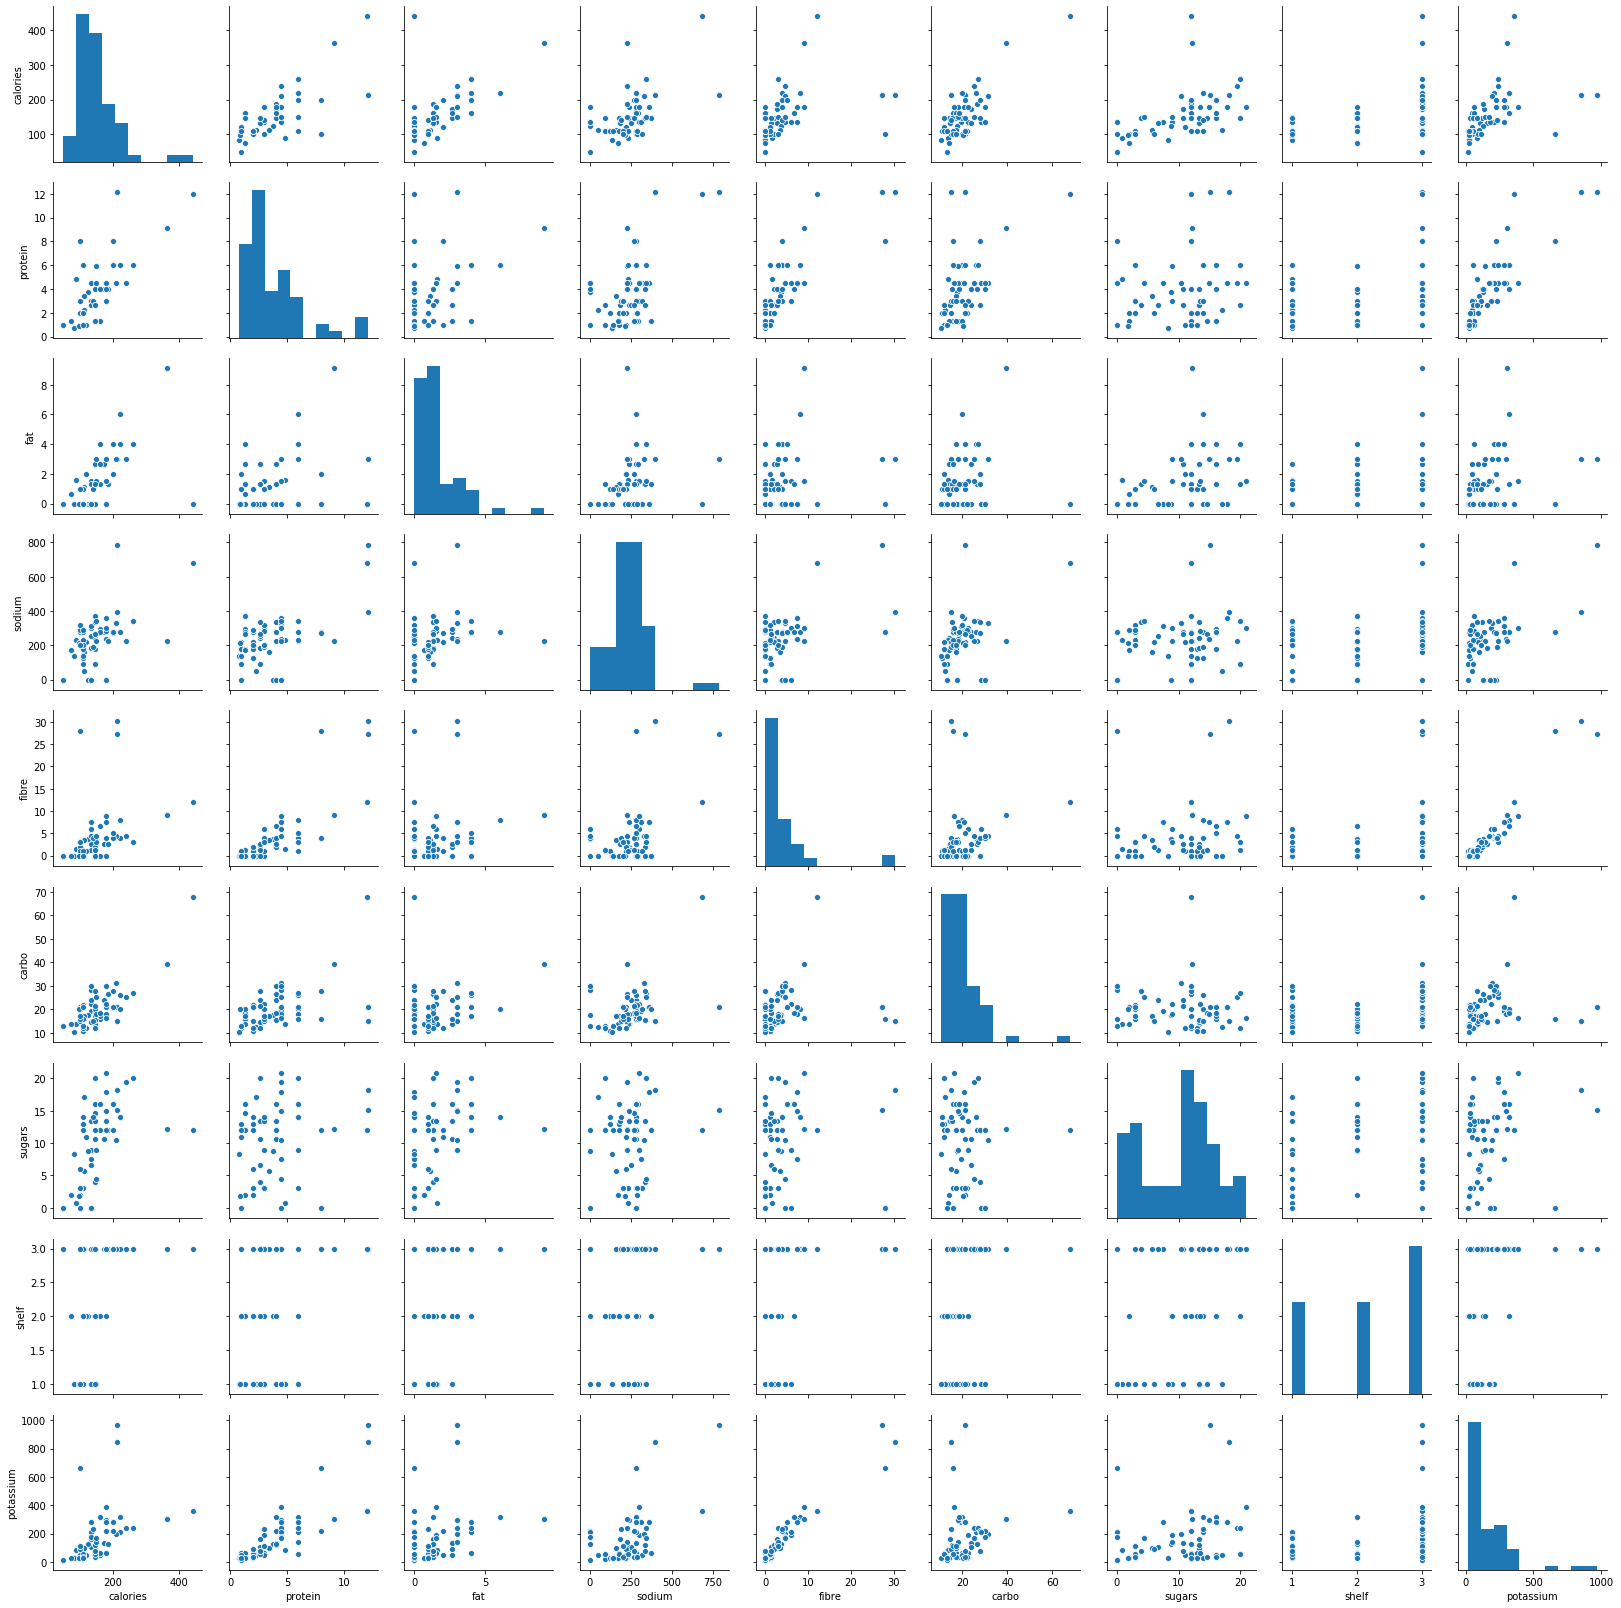

In [23]:
#It is the pair plot having all the feature scatterplot Pairwise and distribution plot
sns.pairplot(data)

In [24]:
#Getting the correlation matrix of the given dataset
correlation_matrix=data.corr()

In [25]:
#Viewing the Correlation Matrix
correlation_matrix

,calories,protein,fat,sodium,fibre,carbo,sugars,shelf,potassium
calories,1.000000,0.706010,0.590176,0.528655,0.388218,0.788723,0.495294,0.426340,0.476596
protein,0.706010,1.000000,0.411266,0.572722,0.809640,0.547090,0.184848,0.396331,0.841754
fat,0.590176,0.411266,1.000000,0.259561,0.226071,0.182852,0.415674,0.325698,0.323275
sodium,0.528655,0.572722,0.259561,1.000000,0.495483,0.423562,0.211244,0.234127,0.556643
fibre,0.388218,0.809640,0.226071,0.495483,1.000000,0.203075,0.148916,0.357843,0.963866
carbo,0.788723,0.547090,0.182852,0.423562,0.203075,1.000000,-0.040826,0.260460,0.242048
sugars,0.495294,0.184848,0.415674,0.211244,0.148916,-0.040826,1.000000,0.290051,0.271833
shelf,0.426340,0.396331,0.325698,0.234127,0.357843,0.260460,0.290051,1.000000,0.426253
potassium,0.476596,0.841754,0.323275,0.556643,0.963866,0.242048,0.271833,0.426253,1.000000


(9.0, 0.0)

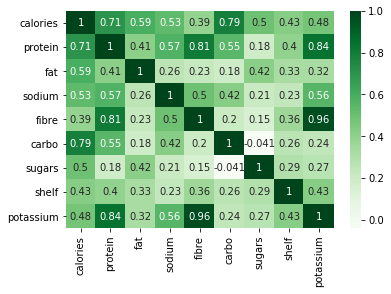

In [26]:
#Plotting the matric using heatap
ax=sns.heatmap(correlation_matrix,annot=True,cmap='Greens')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [27]:
#How many unique values are there in the shelf column
data["shelf"].unique()

array([3, 1, 2])

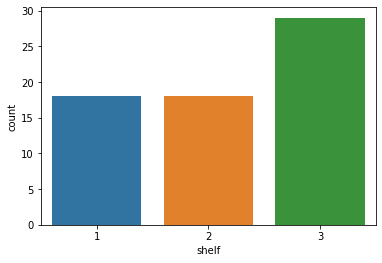

In [28]:
#countplot of the shelf column
sns.countplot("shelf",data=data)

In [29]:
#From here We are going to start making the Machine Learning Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [30]:
#First we start with the Splitting of the data into test and train data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [31]:
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1])

In [32]:
#Building a Decision Tree Classifier First
#As we have very small data set so we can make the decision tree classifier as it takes less time due 
#to availablity of the less and the less computational power
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [33]:
#Making the Confusion of the Given Prediction Comes Out
from sklearn.metrics import confusion_matrix,precision_score,recall_score
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 1  0  0]
 [ 1 13  1]
 [ 0  0  1]]


In [34]:
print("The Accuracy of the model is",classifier.score(X_test,y_test)*100,"%")

The Accuracy of the model is 88.23529411764706 %


In [35]:
#We have to check other model accuracy as well to see how good our model is
#And Precision and Recall is also very important metrics
print("The Precision of the model is",precision_score(y_test, y_pred, average='weighted')*100,"%")

The Precision of the model is 94.11764705882352 %


In [36]:
#We have to check other model accuracy as well to see how good our model is
#And Precision and Recall is also very important metrics
print("The Recall of the model is",recall_score(y_test, y_pred, average='weighted')*100,"%")

The Recall of the model is 88.23529411764706 %


In [37]:
#Use Support Vector Machine Can be a good choice also

In [38]:
classifier=SVC(kernel="linear",random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict( X_test)

In [39]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 0  1  0]
 [ 1 14  0]
 [ 0  0  1]]


In [40]:
print("The Accuracy of the Model is" ,classifier.score(X_test,y_test)*100,"%")

The Accuracy of the Model is 88.23529411764706 %


In [41]:
#We have to check other model accuracy as well to see how good our model is
#And Precision and Recall is also very important metrics
print("The Precision of the model is",precision_score(y_test, y_pred, average='weighted')*100,"%")

The Precision of the model is 88.23529411764706 %


In [42]:
#We have to check other model accuracy as well to see how good our model is
#And Precision and Recall is also very important metrics
print("The Recall of the model is",recall_score(y_test, y_pred, average='weighted')*100,"%")

The Recall of the model is 88.23529411764706 %


In [43]:
#So decision tree is the better classifier to this here
#We didn't use any scaling method now we can attempt.
#We didn't use before because all the algorithm do feature scaling at backend

In [44]:
#First We check with polynomial kernel or kernel Svm Also
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
#Using Kernel Svm
classifier=SVC(kernel="rbf",random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict( X_test)

In [46]:
#Printing the confusion matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 0  1  0]
 [ 0 15  0]
 [ 0  1  0]]


In [47]:
print("The Accuracy of the Model is" ,classifier.score(X_test,y_test)*100,"%")

The Accuracy of the Model is 88.23529411764706 %


In [48]:
#We have to check other model accuracy as well to see how good our model is
#And Precision and Recall is also very important metrics
print("The Precision of the model is",precision_score(y_test, y_pred, average='weighted')*100,"%")

The Precision of the model is 77.8546712802768 %


In [49]:
#We have to check other model accuracy as well to see how good our model is
#And Precision and Recall is also very important metrics
print("The Recall of the model is",recall_score(y_test, y_pred, average='weighted')*100,"%")

The Recall of the model is 88.23529411764706 %


In [50]:
#So no improvement

In [51]:
#We can use ensemble method to check but the dataset is very small here
#But still we can check

In [52]:
#Using Ensemble Method But there is no improvement in this
#Due to less data and all
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [53]:
#Printign the confusion metrics
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 0  1  0]
 [ 0 15  0]
 [ 0  1  0]]


In [54]:
print("The Accuracy of the Model is" ,classifier.score(X_test,y_test)*100,"%")

The Accuracy of the Model is 88.23529411764706 %


In [55]:
#We have to check other model accuracy as well to see how good our model is
#And Precision and Recall is also very important metrics
print("The Precision of the model is",precision_score(y_test, y_pred, average='weighted')*100,"%")

The Precision of the model is 77.8546712802768 %


In [56]:
#We have to check other model accuracy as well to see how good our model is
#And Precision and Recall is also very important metrics
print("The Recall of the model is",recall_score(y_test, y_pred, average='weighted')*100,"%")

The Recall of the model is 88.23529411764706 %
